# Cleansing and Processing

In [55]:
import numpy as np
import pandas as pd

In [56]:
NASA_df = pd.read_csv('Data/NASA.csv')

In [57]:
NASA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        199 non-null    int64  
 1   text                           197 non-null    object 
 2   post_text                      189 non-null    object 
 3   shared_text                    42 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           199 non-null    object 
 6   timestamp                      199 non-null    int64  
 7   image                          84 non-null     object 
 8   image_lowquality               199 non-null    object 
 9   images                         199 non-null    object 
 10  images_description             199 non-null    object 
 11  images_lowquality              199 non-null    object 
 12  images_lowquality_description  199 non-null    obj

In [58]:
NASA_df2 = pd.read_csv("Data/NASA2.csv")

In [59]:
NASA_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   original_request_url           338 non-null    object 
 1   post_url                       338 non-null    object 
 2   post_id                        338 non-null    object 
 3   text                           338 non-null    object 
 4   post_text                      323 non-null    object 
 5   shared_text                    98 non-null     object 
 6   original_text                  1 non-null      object 
 7   time                           338 non-null    object 
 8   timestamp                      333 non-null    float64
 9   image                          134 non-null    object 
 10  image_lowquality               338 non-null    object 
 11  images                         338 non-null    object 
 12  images_description             338 non-null    obj

In [60]:
useful = ['post_url','text', 'time', 'comments', 'shares', 'link', 'links', 'username', 'comments_full',
          'reactions', 'reaction_count', 'was_live']
NASA_final_df = NASA_df2[useful]
NASA_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_url        338 non-null    object 
 1   text            338 non-null    object 
 2   time            338 non-null    object 
 3   comments        336 non-null    float64
 4   shares          338 non-null    int64  
 5   link            312 non-null    object 
 6   links           338 non-null    object 
 7   username        338 non-null    object 
 8   comments_full   338 non-null    object 
 9   reactions       338 non-null    object 
 10  reaction_count  338 non-null    int64  
 11  was_live        336 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 31.8+ KB


In [61]:
NASA_final_df['time'] = pd.to_datetime(NASA_final_df['time'])
NASA_final_df['date'] = NASA_final_df['time'].dt.date
NASA_final_df['hours'] = NASA_final_df['time'].dt.hour

C:\Users\Admin\AppData\Local\Temp\ipykernel_24864\1176000566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['time'] = pd.to_datetime(NASA_final_df['time'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_24864\1176000566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['date'] = NASA_final_df['time'].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_24864\1176000566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [62]:
NASA_final_df.duplicated().sum()

0

In [63]:
NASA_final_df.isnull().sum()

post_url           0
text               0
time               0
comments           2
shares             0
link              26
links              0
username           0
comments_full      0
reactions          0
reaction_count     0
was_live           2
date               0
hours              0
dtype: int64

In [64]:
not_empty = NASA_final_df[NASA_final_df['comments_full'].apply(lambda x : (len(x) > 2))]
not_empty.shape

(79, 14)

In [65]:
NASA_final_df['comments_full'] = NASA_final_df['comments_full'].replace('[]', None)
NASA_final_df = NASA_final_df.fillna(NASA_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24864\3148922942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['comments_full'] = NASA_final_df['comments_full'].replace('[]', None)


In [66]:
NASA_final_df['comments_full'] = NASA_final_df['comments_full'].fillna('[]')
NASA_final_df['comments_full'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: comments_full
Non-Null Count  Dtype 
--------------  ----- 
338 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [67]:
not_empty = NASA_final_df[NASA_final_df['comments_full'].apply(lambda x : (len(x) > 2))]
not_empty.shape

(125, 14)

In [68]:
NASA_final_df['comments'] = NASA_final_df['comments'].fillna(0)
NASA_final_df['link'] = NASA_final_df['link'].fillna('')

In [69]:
NASA_final_df['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: time
Non-Null Count  Dtype         
--------------  -----         
338 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 KB


In [70]:
NASA_final_df.to_csv('Data/NASA_final.csv',index=False)

# Analysis
## Basic analysis

In [71]:
NASA = NASA_final_df
NASA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_url        338 non-null    object        
 1   text            338 non-null    object        
 2   time            338 non-null    datetime64[ns]
 3   comments        338 non-null    float64       
 4   shares          338 non-null    int64         
 5   link            338 non-null    object        
 6   links           338 non-null    object        
 7   username        338 non-null    object        
 8   comments_full   338 non-null    object        
 9   reactions       338 non-null    object        
 10  reaction_count  338 non-null    int64         
 11  was_live        337 non-null    object        
 12  date            338 non-null    object        
 13  hours           338 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memo

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
NASA.describe()

comments        shares  reaction_count       hours
count    338.000000    338.000000      338.000000  338.000000
mean     480.310651   1251.360947     6219.286982    9.133136
std     1105.158689   5660.011863    16813.212399    8.915530
min        0.000000      0.000000      366.000000    0.000000
25%      141.250000    167.000000     1576.000000    2.000000
50%      234.500000    285.000000     2667.500000    4.000000
75%      393.250000    568.750000     5099.750000   21.000000
max    13538.000000  63257.000000   202242.000000   23.000000

In [74]:
date_related = NASA[['date', 'comments', 'shares', 'reaction_count']]
date_related = pd.DataFrame(date_related.groupby(['date']).sum())
date_related

comments  shares  reaction_count
date                                        
2023-05-13     611.0     693            7890
2023-05-15     171.0     250            2437
2023-05-16     280.0     222            2218
2023-05-17    1602.0     710            5590
2023-05-18     406.0     337            4258
...              ...     ...             ...
2023-11-21     731.0    1780           10285
2023-11-22     708.0     738            6454
2023-11-23    1370.0     464            6206
2023-11-24     148.0     169            1082
2023-11-25      92.0     160             764

[163 rows x 3 columns]

### Looking at the distributions

In [75]:
# The beginning and the end of all the date
begin_date = date_related.index[0]
end_date = date_related.index[-1]

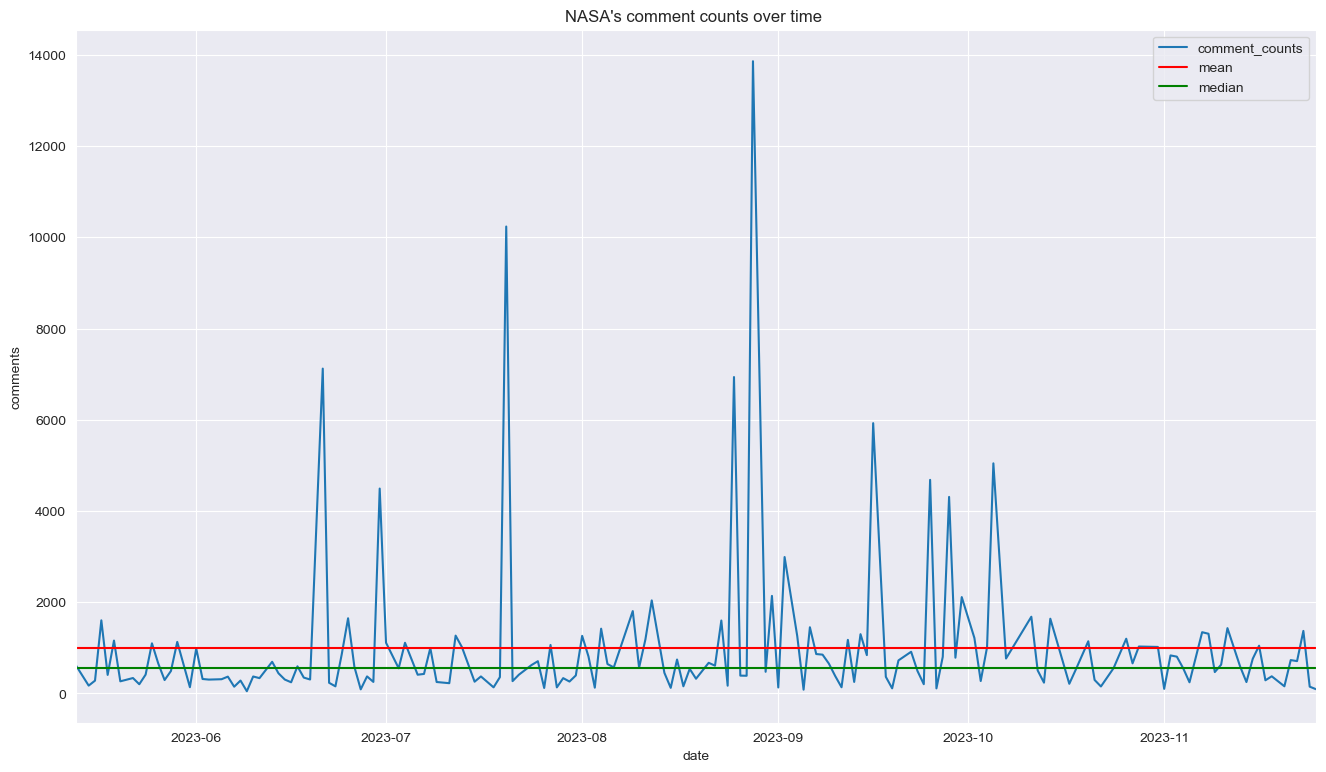

In [76]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(data=date_related['comments'], ax = ax)

mean_comment = date_related['comments'].mean()
med_comment = date_related['comments'].median()

plt.axhline(y=mean_comment, color='red')
plt.axhline(y=med_comment, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s comment counts over time ')
plt.legend(labels=['comment_counts', 'mean', 'median'])

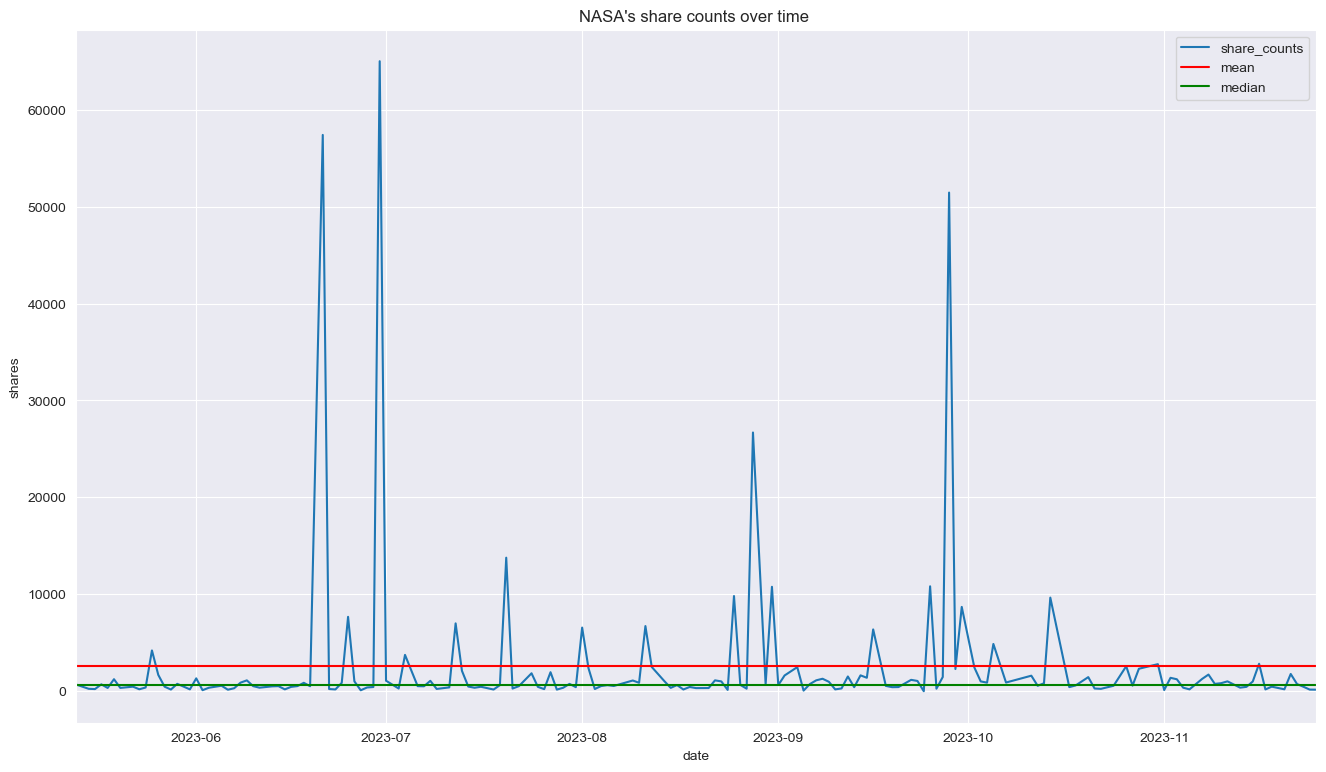

In [77]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(data=date_related['shares'], ax = ax)

mean_share = date_related['shares'].mean()
med_share = date_related['shares'].median()

plt.axhline(y=mean_share, color='red')
plt.axhline(y=med_share, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s share counts over time ')
plt.legend(labels=['share_counts', 'mean', 'median'])

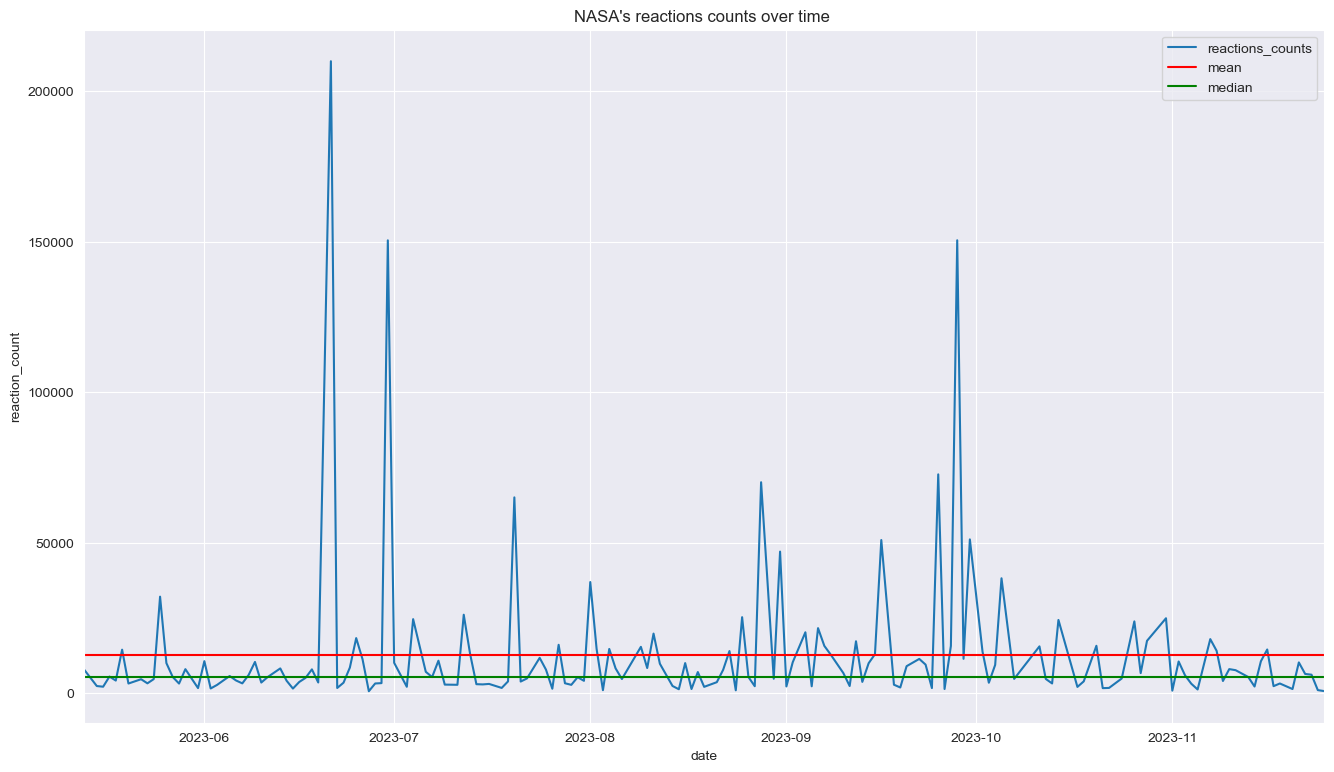

In [78]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=date_related['reaction_count'], ax = ax)
plt.legend(labels=['reaction_count'])

mean_reacts = date_related['reaction_count'].mean()
med_reacts = date_related['reaction_count'].median()

plt.axhline(y=mean_reacts, color='red')
plt.axhline(y=med_reacts, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s reactions counts over time ')
plt.legend(labels=['reactions_counts', 'mean', 'median'])

### Finding and analyze the outlier

In [79]:
# find outlier
outlier_comment = date_related[date_related['comments'] > mean_comment + 2 * date_related['comments'].std()]
outlier_comment

comments  shares  reaction_count
date                                        
2023-06-21    7121.0   57394          209978
2023-06-30    4491.0   64998          150481
2023-07-20   10236.0   13777           65103
2023-08-25    6936.0    9821           25310
2023-08-28   13860.0   26693           70133
2023-09-16    5925.0    6378           50939
2023-09-25    4682.0   10824           72748
2023-10-05    5044.0    4877           38231

In [80]:
# Find all the posts in all the days that have sudden grow of numbers
outlier_posts_comment = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_comment.index))]
outlier_posts_comment.head()

post_url  \
67  https://facebook.com/story.php?story_fbid=9501...   
71  https://facebook.com/story.php?story_fbid=1324...   
77  https://facebook.com/story.php?story_fbid=1115...   
82  https://m.facebook.com/NASA/posts/860674359085886   
83  https://m.facebook.com/NASA/posts/999840931284213   

                                                 text                time  \
67  Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
71  Watch the Psyche spacecraft launch from NASA’s... 2023-10-05 21:57:35   
77  Watch as the first asteroid sample collected i... 2023-10-05 03:28:27   
82  FRI, 13 OCT\nPsyche Launches to a Metal Astero... 2023-10-05 22:06:52   
83  WED, 11 OCT\nRevealing the OSIRIS-REx Asteroid... 2023-10-05 05:43:17   

    comments  shares                                               link  \
67   13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
71    2752.0    2686  https://spaceplace.nasa.gov/psyche-launch-bing...   
77    1901.0    2144  https://science.nasa.gov/mission/osiris-rex/?f...   
82     187.0      47  https://go.nasa.gov/48CRuhP?fbclid=IwAR1QSP67D...   
83     204.0       0  https://science.nasa.gov/skywatching/whats-up/...   

                                                links  \
67  [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
71                                                 []   
77  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
82  [{'link': '/events/feed/watch/?feed_data%5Brep...   
83  [{'link': '/events/feed/watch/?feed_data%5Brep...   

                                             username comments_full  \
67  NASA - National Aeronautics and Space Administ...            []   
71  NASA - National Aeronautics and Space Administ...            []   
77  NASA - National Aeronautics and Space Administ...            []   
82  NASA - National Aeronautics and Space Administ...            []   
83  NASA - National Aeronautics and Space Administ...            []   

                                            reactions  reaction_count  \
67  {'like': 44940, 'love': 19860, 'haha': 121, 'w...           66340   
71  {'like': 12946, 'love': 3944, 'haha': 108, 'wo...           17320   
77  {'like': 12077, 'love': 3344, 'haha': 145, 'wo...           15881   
82  {'like': 1172, 'love': 197, 'haha': 18, 'wow':...            1414   
83  {'like': 3092, 'love': 420, 'haha': 46, 'wow':...            3616   

   was_live        date  hours  
67     True  2023-08-28     21  
71     True  2023-10-05     21  
77     True  2023-10-05      3  
82     True  2023-10-05     22  
83     True  2023-10-05      5

In [81]:
outlier_posts_comment['date'].value_counts()

2023-09-16    8
2023-10-05    4
2023-09-25    4
2023-08-25    4
2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-07-20    2
Name: date, dtype: int64

In [82]:
outlier_posts_comment[outlier_posts_comment['comments'] > mean_comment]['comments']

67     13538.0
71      2752.0
77      1901.0
101     2945.0
102     4166.0
162     2638.0
166     3975.0
224    10182.0
256     3936.0
274     6734.0
Name: comments, dtype: float64

In [83]:
# find outlier
outlier_share = date_related[date_related['shares'] > mean_share + 2 * date_related['shares'].std()]
outlier_share

comments  shares  reaction_count
date                                        
2023-06-21    7121.0   57394          209978
2023-06-30    4491.0   64998          150481
2023-08-28   13860.0   26693           70133
2023-09-28    4308.0   51446          150505

In [84]:
outlier_posts_share = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_share.index))]
outlier_posts_share.head()

post_url  \
67   https://facebook.com/story.php?story_fbid=9501...   
94   https://facebook.com/story.php?story_fbid=pfbi...   
95   https://facebook.com/story.php?story_fbid=pfbi...   
158  https://facebook.com/story.php?story_fbid=pfbi...   
159  https://m.facebook.com/NASA/posts/257401430535836   

                                                  text                time  \
67   Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
94   Carolina Rudisel would have never imagined she... 2023-09-28 03:26:21   
95   Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
158  Save the date for a solar eclipse: On Oct. 14,... 2023-08-28 21:26:43   
159  SAT, 14 OCT\nThe Ring of Fire: 2023 Annular So... 2023-08-28 21:30:20   

     comments  shares                                               link  \
67    13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
94        1.0      28  https://www.nasa.gov/faces-of-nasa/carolina-ru...   
95     4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
158     247.0     617                          https://fb.me/e/8oN0ufeG6   
159      75.0       0  https://media1.tenor.co/m/_zTvAtDWeEMAAAAd/gol...   

                                                 links  \
67   [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
94   [{'link': 'https://lm.facebook.com/l.php?u=htt...   
95   [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...   
158  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
159  [{'link': '/events/feed/watch/?feed_data%5Brep...   

                                              username  \
67   NASA - National Aeronautics and Space Administ...   
94   NASA - National Aeronautics and Space Administ...   
95   NASA - National Aeronautics and Space Administ...   
158  NASA - National Aeronautics and Space Administ...   
159  NASA - National Aeronautics and Space Administ...   

                                         comments_full  \
67                                                  []   
94   [{'comment_id': '585501493626102', 'comment_ur...   
95                                                  []   
158                                                 []   
159  [{'comment_id': '257659173843395', 'comment_ur...   

                                             reactions  reaction_count  \
67   {'like': 44940, 'love': 19860, 'haha': 121, 'w...           66340   
94   {'like': 670, 'love': 143, 'haha': 3, 'wow': 7...             832   
95   {'like': 55254, 'love': 86757, 'haha': 560, 'w...          149673   
158  {'like': 1465, 'love': 395, 'haha': 6, 'wow': ...            1919   
159  {'like': 1547, 'love': 283, 'haha': 7, 'wow': ...            1874   

    was_live        date  hours  
67      True  2023-08-28     21  
94     False  2023-09-28      3  
95     False  2023-09-28      1  
158    False  2023-08-28     21  
159     True  2023-08-28     21

In [85]:
outlier_posts_share['date'].value_counts()

2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-09-28    2
Name: date, dtype: int64

In [86]:
outlier_posts_share[outlier_posts_share['shares'] > mean_share]['shares']
# Cosmology event

67     26076
95     51418
256    63257
274    55947
Name: shares, dtype: int64

In [87]:
outlier_reaction = date_related[date_related['reaction_count'] > mean_reacts + 2 * date_related['reaction_count'].std()]
outlier_reaction

comments  shares  reaction_count
date                                        
2023-06-21    7121.0   57394          209978
2023-06-30    4491.0   64998          150481
2023-07-20   10236.0   13777           65103
2023-08-28   13860.0   26693           70133
2023-09-25    4682.0   10824           72748
2023-09-28    4308.0   51446          150505

In [88]:
outlier_posts_reactions = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_reaction.index)) ]
outlier_posts_reactions.head()

post_url  \
67  https://facebook.com/story.php?story_fbid=9501...   
94  https://facebook.com/story.php?story_fbid=pfbi...   
95  https://facebook.com/story.php?story_fbid=pfbi...   
97  https://facebook.com/story.php?story_fbid=1031...   
99  https://facebook.com/story.php?story_fbid=pfbi...   

                                                 text                time  \
67  Watch live with us as a “ring of fire” eclipse... 2023-08-28 21:18:08   
94  Carolina Rudisel would have never imagined she... 2023-09-28 03:26:21   
95  Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
97  On Sunday, Sept. 24, 2023, NASA’s OSIRIS-REx s... 2023-09-25 21:16:43   
99  We're only a few weeks away from the "ring of ... 2023-09-25 23:25:37   

    comments  shares                                               link  \
67   13538.0   26076  https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...   
94       1.0      28  https://www.nasa.gov/faces-of-nasa/carolina-ru...   
95    4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
97     662.0     366  https://blogs.nasa.gov/osiris-rex?fbclid=IwAR2...   
99     932.0    5950  https://go.nasa.gov/3t4VMym?fbclid=IwAR1lTTUIg...   

                                                links  \
67  [{'link': '/hashtag/asknasa?refid=52&__tn__=%2...   
94  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
95  [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...   
97  [{'link': 'https://lm.facebook.com/l.php?u=htt...   
99  [{'link': 'https://lm.facebook.com/l.php?u=htt...   

                                             username  \
67  NASA - National Aeronautics and Space Administ...   
94  NASA - National Aeronautics and Space Administ...   
95  NASA - National Aeronautics and Space Administ...   
97  NASA - National Aeronautics and Space Administ...   
99  NASA - National Aeronautics and Space Administ...   

                                        comments_full  \
67                                                 []   
94  [{'comment_id': '585501493626102', 'comment_ur...   
95                                                 []   
97                                                 []   
99                                                 []   

                                            reactions  reaction_count  \
67  {'like': 44940, 'love': 19860, 'haha': 121, 'w...           66340   
94  {'like': 670, 'love': 143, 'haha': 3, 'wow': 7...             832   
95  {'like': 55254, 'love': 86757, 'haha': 560, 'w...          149673   
97  {'like': 2506, 'love': 543, 'haha': 32, 'wow':...            3138   
99  {'like': 14144, 'love': 5425, 'haha': 31, 'wow...           20110   

   was_live        date  hours  
67     True  2023-08-28     21  
94    False  2023-09-28      3  
95    False  2023-09-28      1  
97     True  2023-09-25     21  
99    False  2023-09-25     23

In [89]:
outlier_posts_reactions['date'].value_counts()

2023-09-25    4
2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-09-28    2
2023-07-20    2
Name: date, dtype: int64

In [90]:
outlier_posts_reactions[outlier_posts_reactions['shares'] > mean_share]['reaction_count']
#Cosmology event

67      66340
95     149673
99      20110
101     47979
224     63832
256    136631
274    202242
Name: reaction_count, dtype: int64

Text(0.5, 1.0, 'Correlation of comments,shares,reactions')

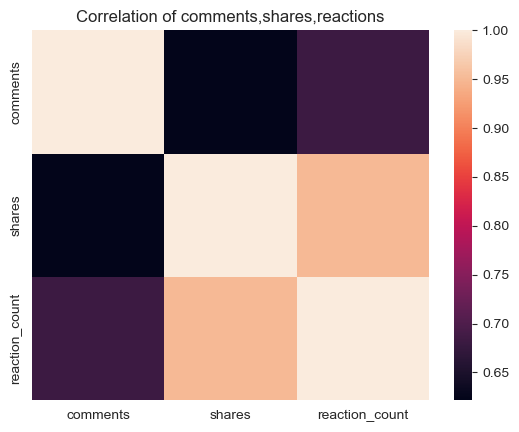

In [91]:
cmt_share_react = date_related[['comments','shares', 'reaction_count']]

sns.heatmap(cmt_share_react.corr())
plt.title('Correlation of comments,shares,reactions')

Text(0.5, 1.0, 'Share-Reactions Correlation')

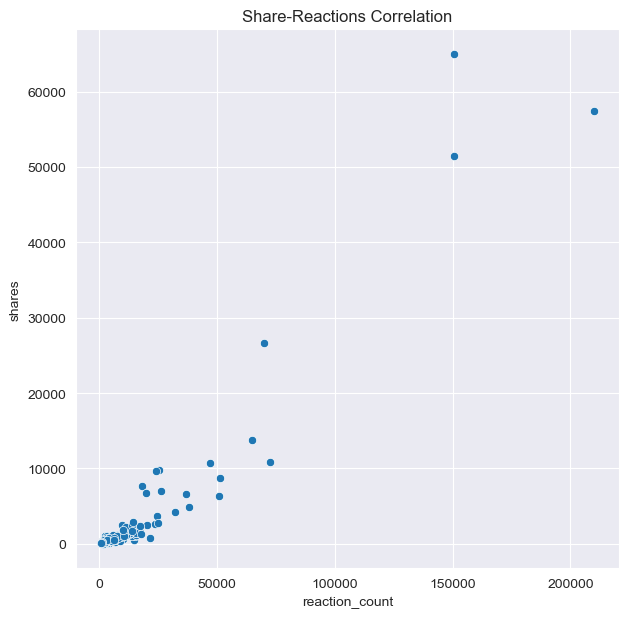

In [92]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=cmt_share_react, y='shares', x='reaction_count')

plt.title('Share-Reactions Correlation')

## Post's content analysis
### Text analysis

In [93]:
# %pip install wordcloud

In [94]:
all_posts_content = NASA['text']
all_text = str(all_posts_content).replace('\\n',' ')

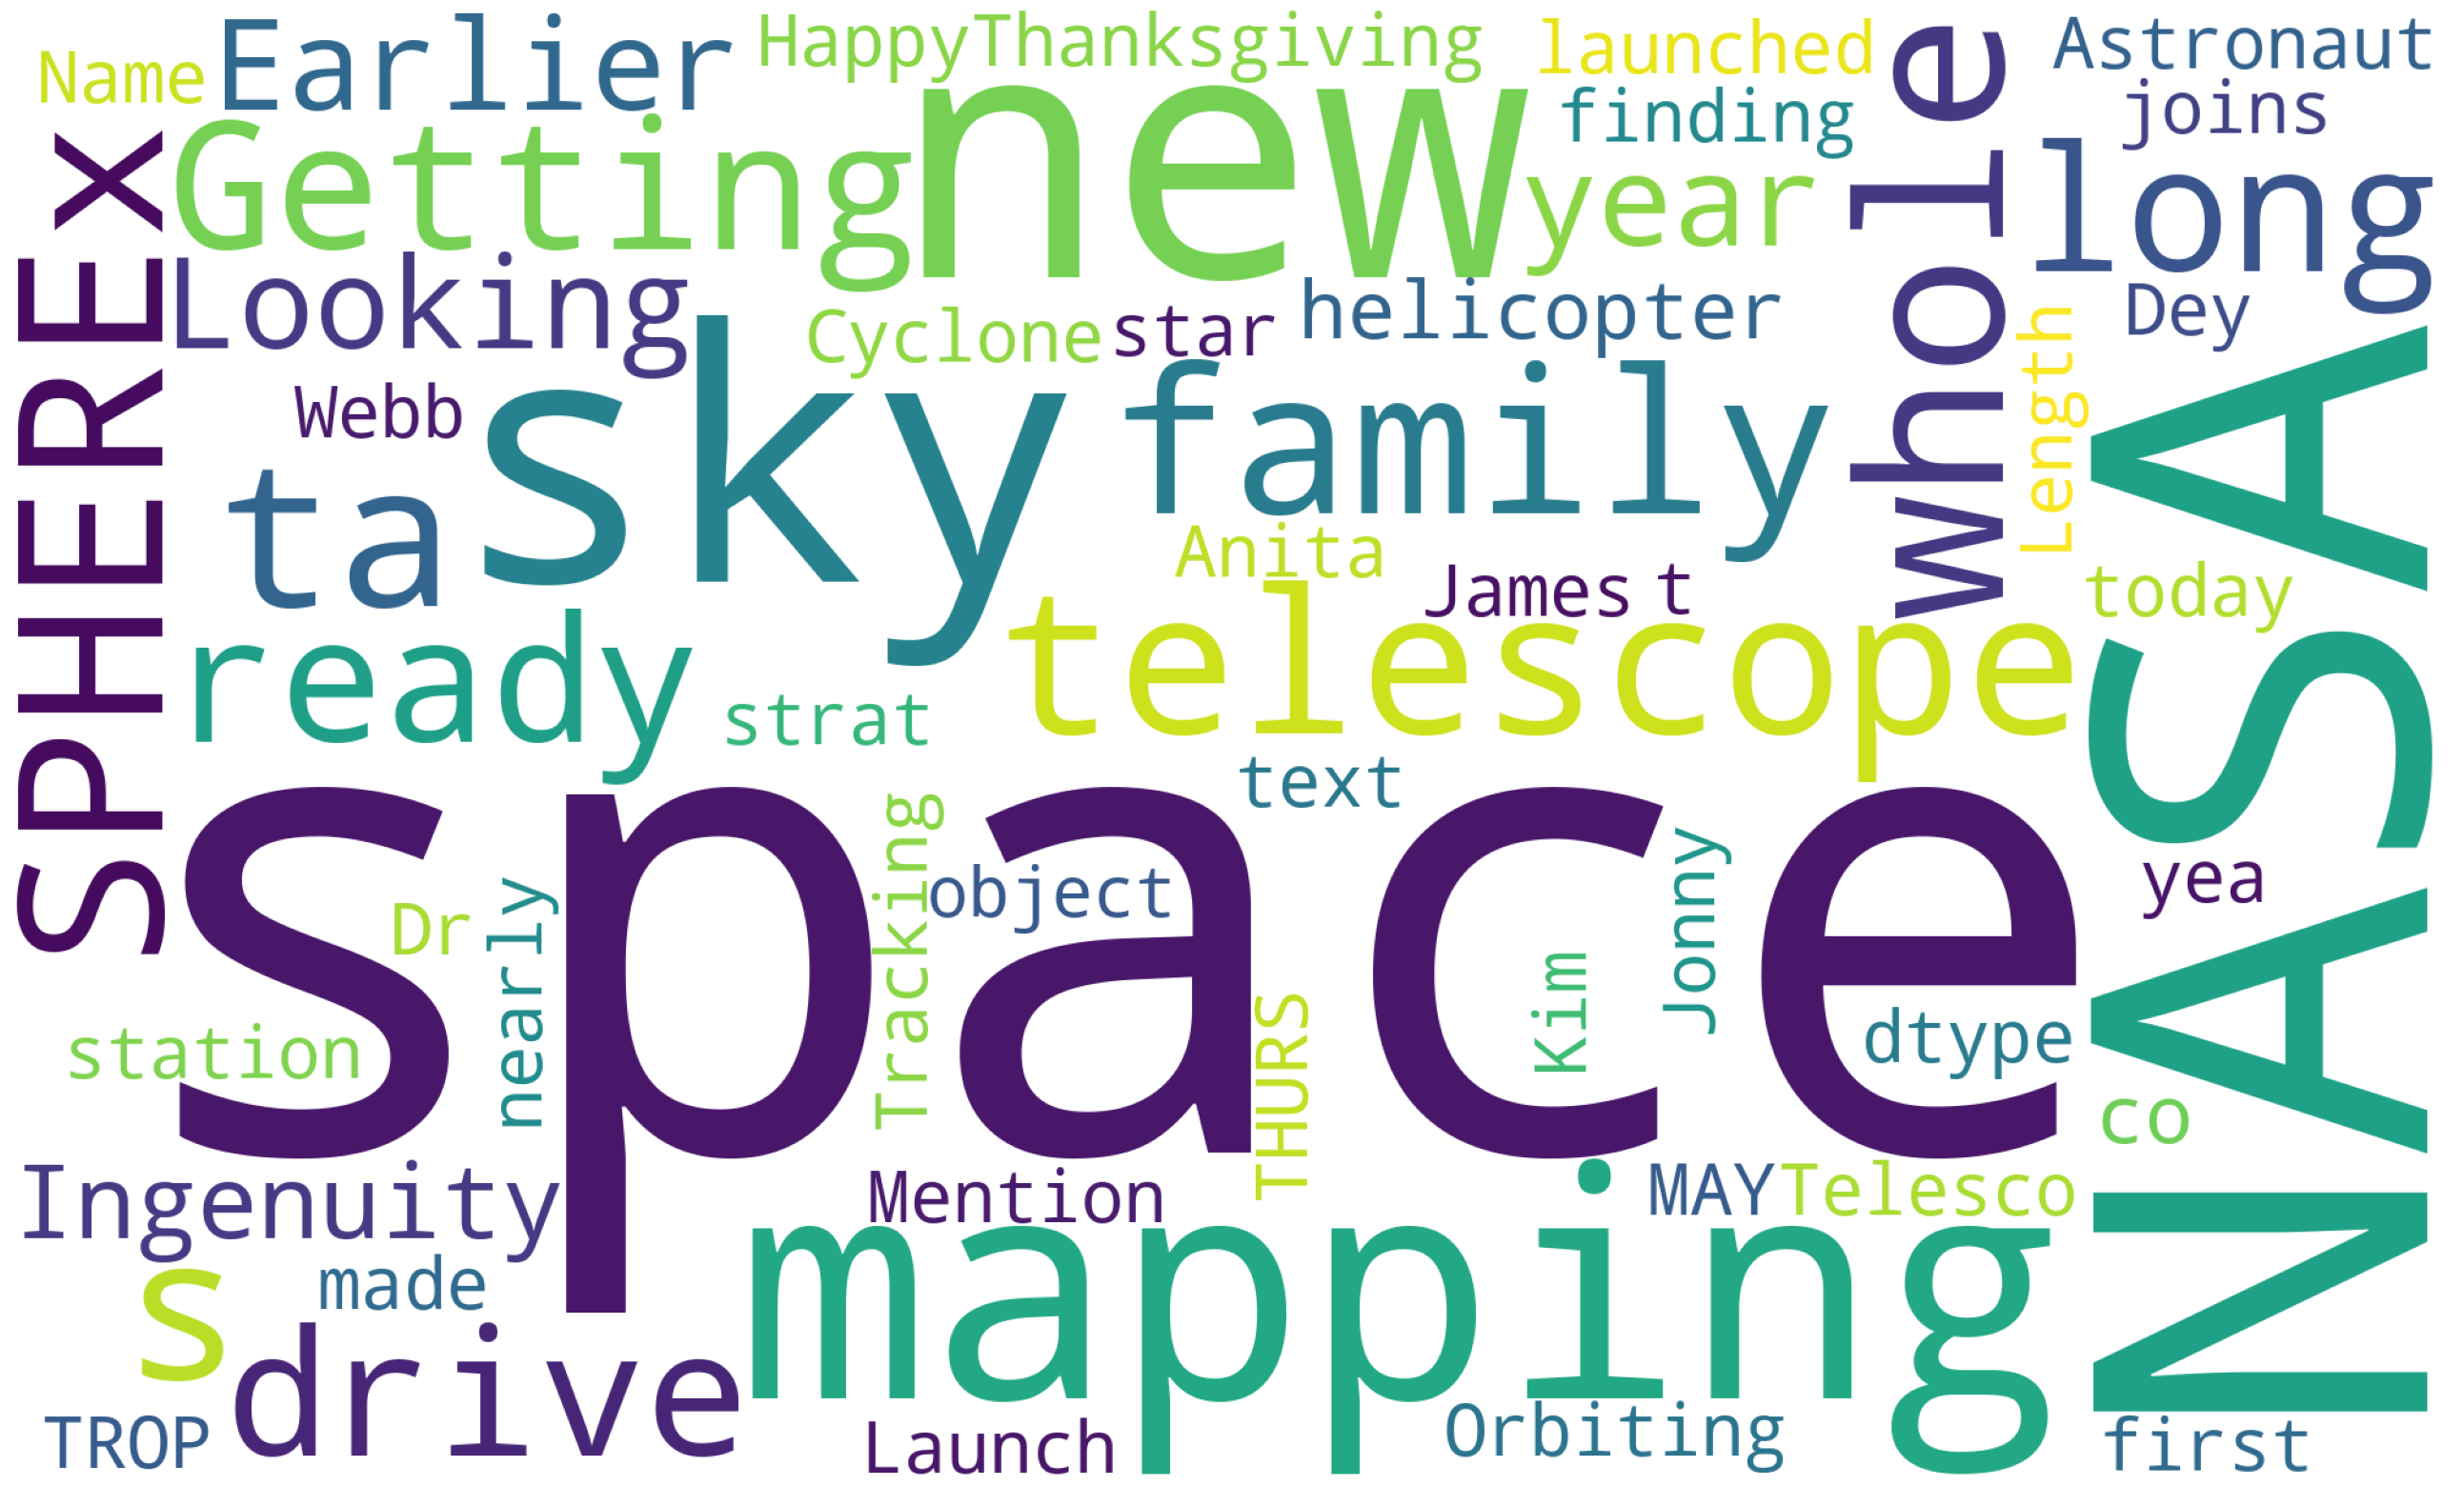

In [95]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                      ).generate(all_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Share's content analysis

In [96]:
NASA[['link', 'links']].describe()

link links
count   338   338
unique  326   328
top            []
freq      9    11

In [97]:
main_links_list = NASA['link'].tolist()
main_url_list = []
for link in main_links_list:
    main_url_list.append(link)


In [98]:
import re

In [99]:
main_url_tokens = []
for url in main_url_list:
    pattern = '\/\S*\?'
    match = re.search(pattern=pattern,string= url)
    if match is not None:
        result = match.group()
        tokens = result.split('/')
        for token in tokens:
            if len(token) > 1:
                main_url_tokens.append(token)


In [100]:
main_url_tokens_s = pd.Series(main_url_tokens)
main_url_tokens_s.value_counts()

go.nasa.gov     186
nasa.gov         39
www.nasa.gov     30
subscribe?       21
bit.ly           12
               ... 
460bvgl?          1
3LeYPdr?          1
viper?            1
3PjL1Rt?          1
44Y7Xve?          1
Length: 321, dtype: int64

In [101]:
links_list = NASA['links'].tolist()
all_links = [list(eval(links)) for links in links_list]
url_list = []
for links in all_links:
    for link in links:
        url_list.append(link['link'])



In [102]:
for url in url_list:
    pattern = '\/\S*\?'
    match = re.search(pattern=pattern,string= url)

In [103]:
hashtags = []
pages = []
for url in url_list:
    pattern = '\/\S*\?'
    match = re.search(pattern=pattern,string= url)
    result = match.group()
    if result[0:1] == '//':
        continue
    elif 'hashtag' in result:
        hashtags.append(result[9:-1])
    elif result.count('/') == 1 and result != '/story.php?':
        pages.append(result[1:-1])


#### hashtag

In [104]:
full_hashtag = ' '.join(hashtags)


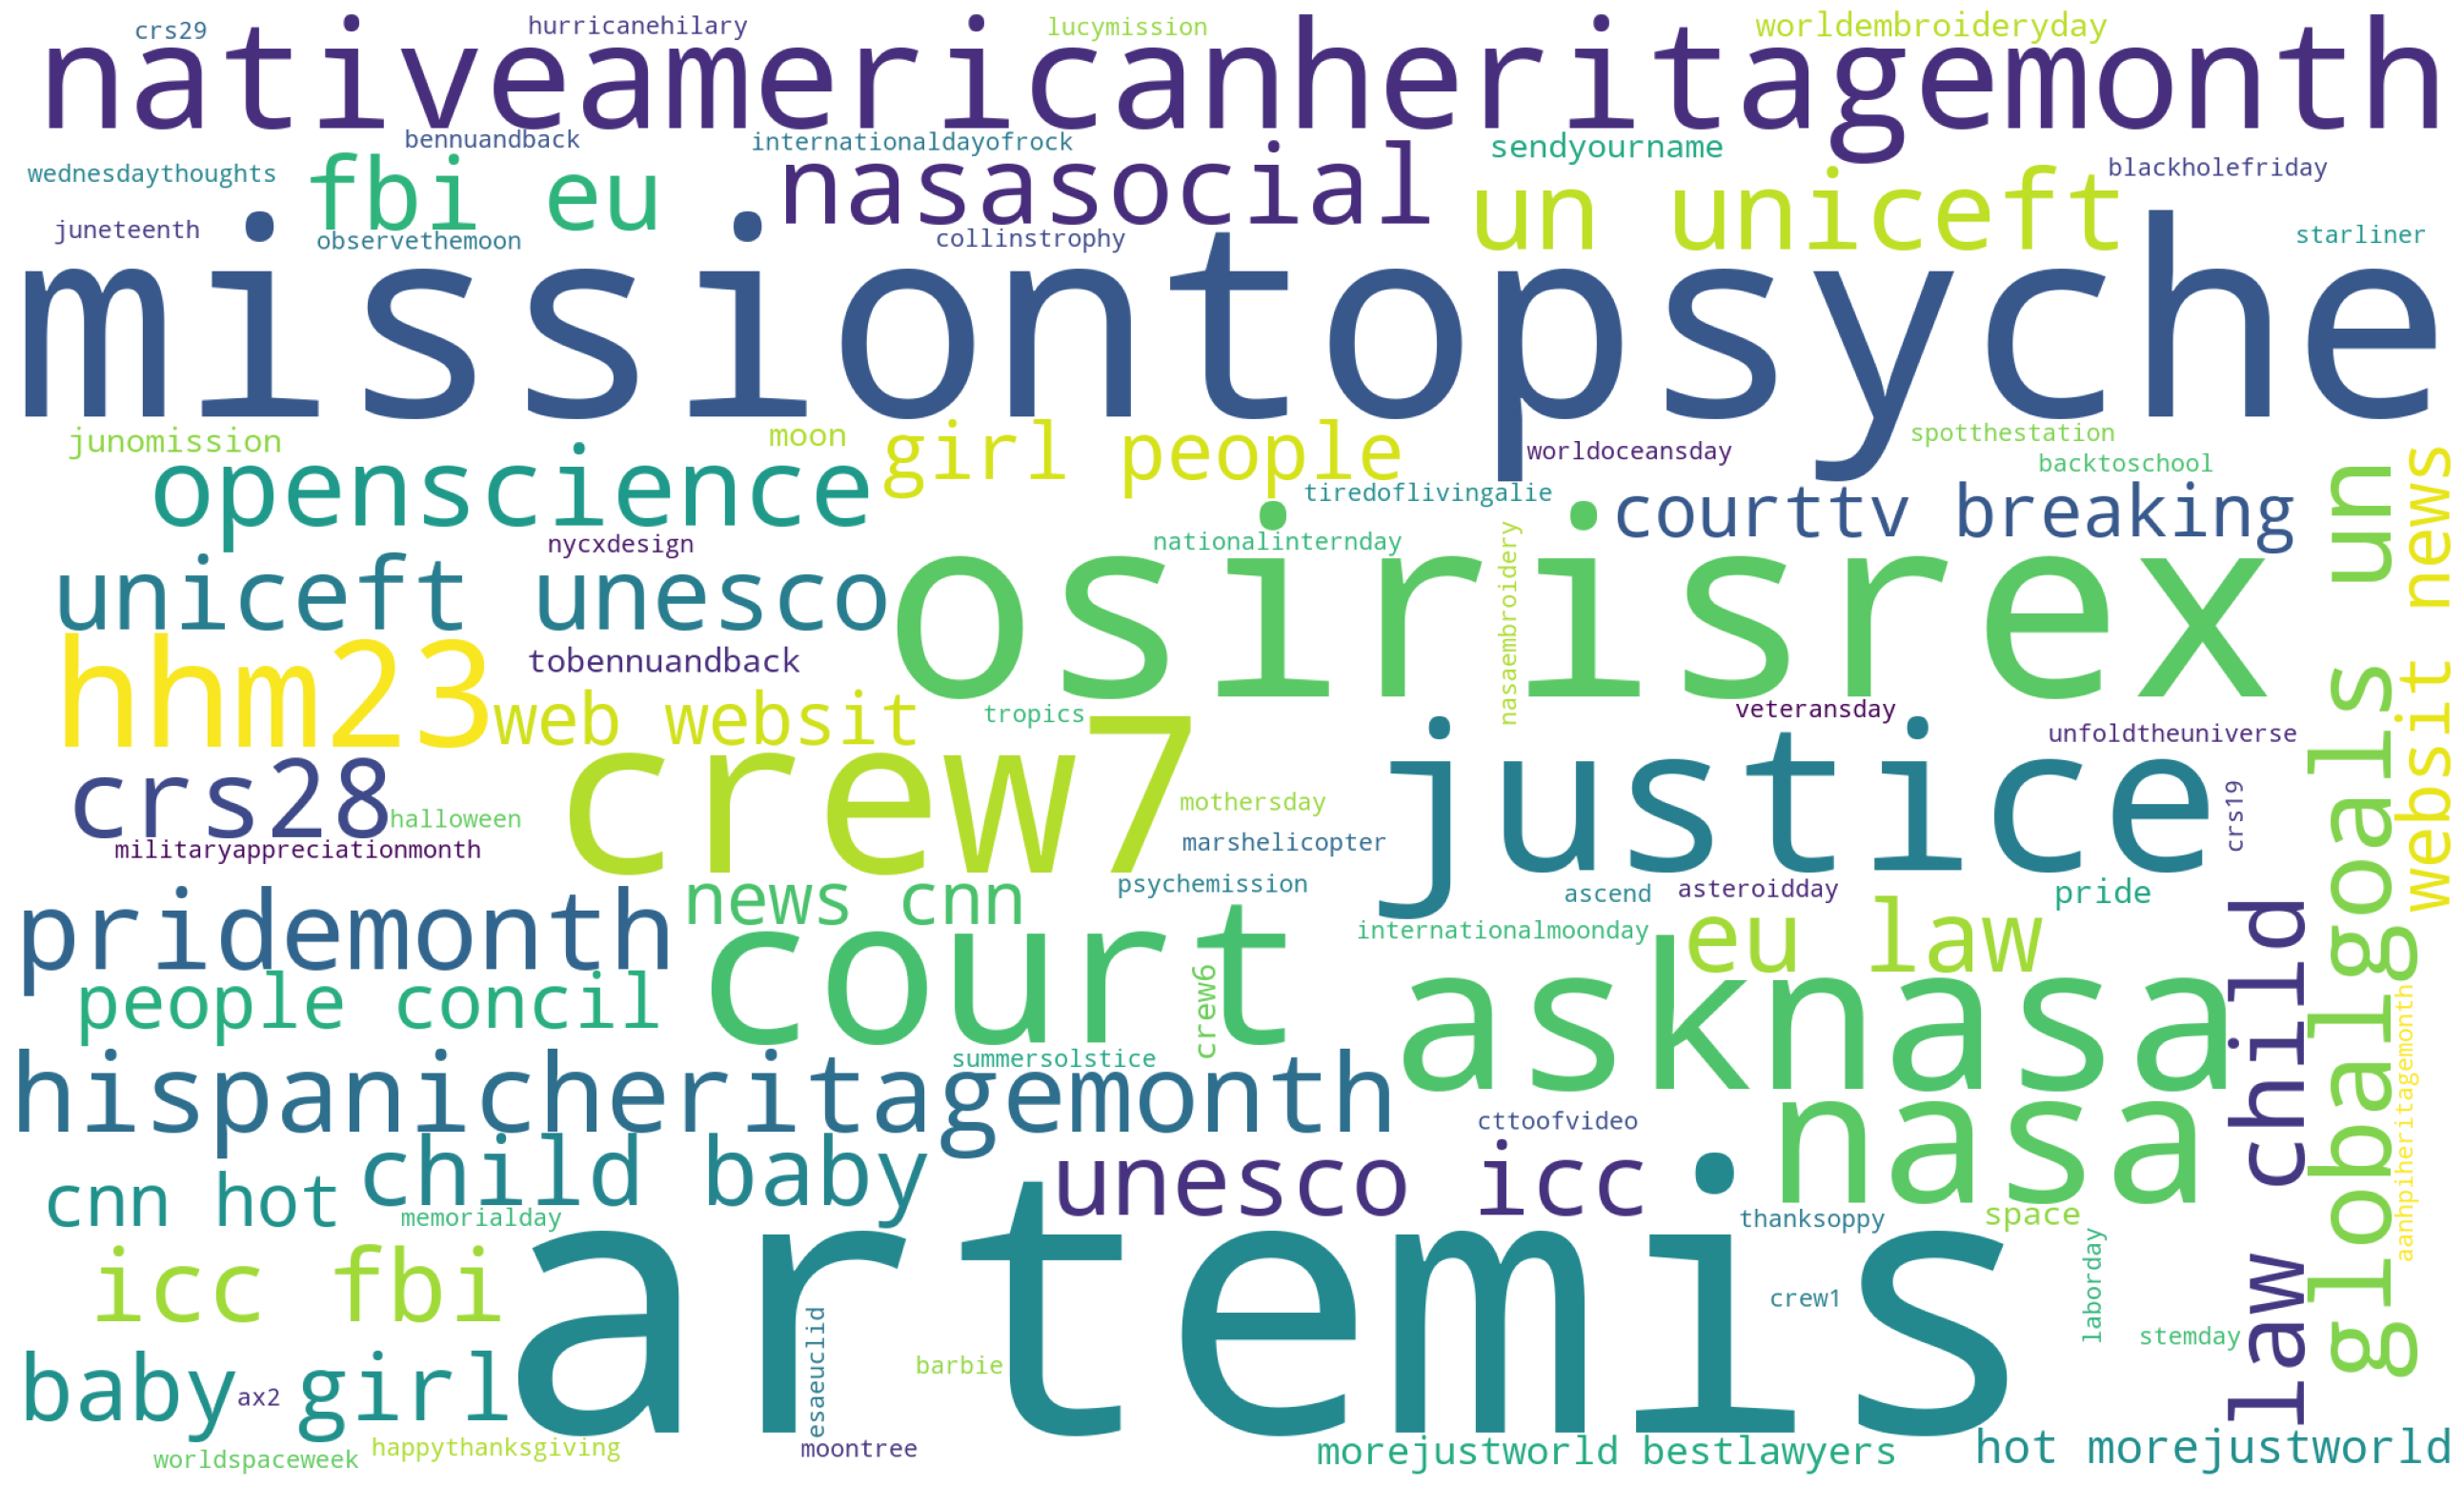

In [105]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                      ).generate(full_hashtag)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Artemis
OrisisRex
Justice
nasa
MissionToPsyche
court
crew7
asknasa

#### pages

In [106]:
pages = pd.Series(pages).unique()
pd.Series(pages).to_csv('Data/pages.csv', index=False)

In [107]:
pages_info = pd.read_csv('Data/pages_info.csv')

In [108]:
intro_list = pages_info['Page transparency\nSee all'].tolist()
intro_list[1]

'See all\nFacebook is showing information to help you understand the purpose of this Page.\n382651265048\nPage ID\n2 March 2010\nCreation date\nAdmin info\nThis Page can have multiple admins. They may have permission to post content, comment or send messages as the Page.\nThis Page is not currently running ads.\nNATIONAL AERONAUTICS AND SPACE ADMINISTRATION is responsible for this Page.'

In [109]:
org_list = []
for intro in intro_list:
    tokens = intro.split('\n')
    if tokens[-1] == 'This Page is not currently running ads.':
        continue
    org_list.append(tokens[-1].replace('is responsible for this Page.', ''))

In [110]:
org_list = pd.Series(org_list)
org_list.value_counts()

NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                              20
Spotify USA Inc.                                                            1
The Boeing Company                                                          1
United States Postal Service                                                1
Jane Goodall Institute for Wildlife Research, Conservation & Education      1
CENTER FOR THE ADVANCEMENT OF SCIENCE IN SPACE, INC.                        1
MANNED SPACE FLIGHT EDUCATION FOUNDATION INCORPORA                          1
UNITED STATES DEPT OF EDUCATION                                             1
dtype: int64

In [111]:
pages_info['Category'].value_counts()

Government organisation                19
Science, technology & engineering       5
Aerospace company                       5
Non-profit organisation                 3
Science website                         2
Interest                                2
Educational research centre             2
Public figure                           2
Intergovernmental organisation          1
Product/Service                         1
Science                                 1
Post office                             1
Radio station                           1
Education                               1
Government website                      1
Non-governmental organisation (NGO)     1
Science museum                          1
Name: Category, dtype: int64

## Reactions analysis

In [112]:
reactions_list = NASA['reactions'].tolist()
all_reactions = [dict(eval(reactions)) for reactions in reactions_list]
all_reactions = pd.DataFrame(all_reactions)
all_reactions = all_reactions.fillna(0)
all_reactions.head()

like  love  haha  wow  care  sad  angry
0   637   113     5    2     7  0.0    0.0
1   817   235    10    6    14  0.0    0.0
2  3532   690   365   27    37  2.0    2.0
3  1219   270     9   34    17  1.0    1.0
4  2091   739    54   14    51  1.0    0.0

In [113]:
all_reactions_sum = all_reactions.sum()
all_reactions_sum

like     1391931.0
love      586245.0
haha       30122.0
wow        65830.0
care       23300.0
sad         3489.0
angry       1202.0
dtype: float64

Text(0.5, 1.0, 'Reaction sum by types')

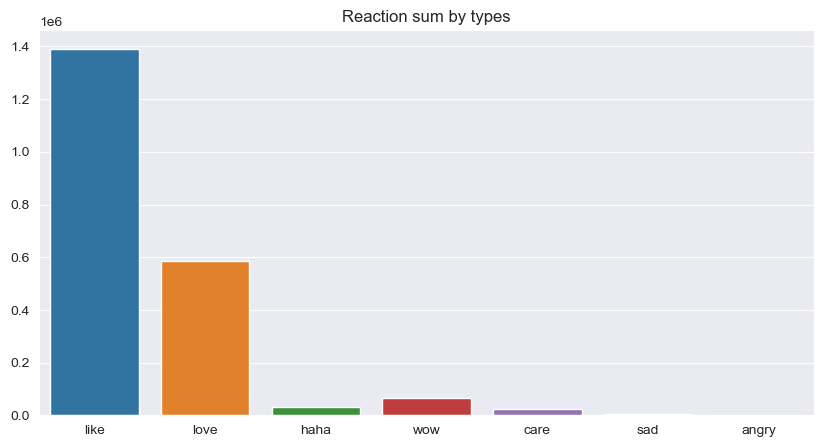

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=all_reactions_sum.index, y=all_reactions_sum.values)
plt.title('Reaction sum by types')

Text(0.5, 1.0, 'Reactions over time')

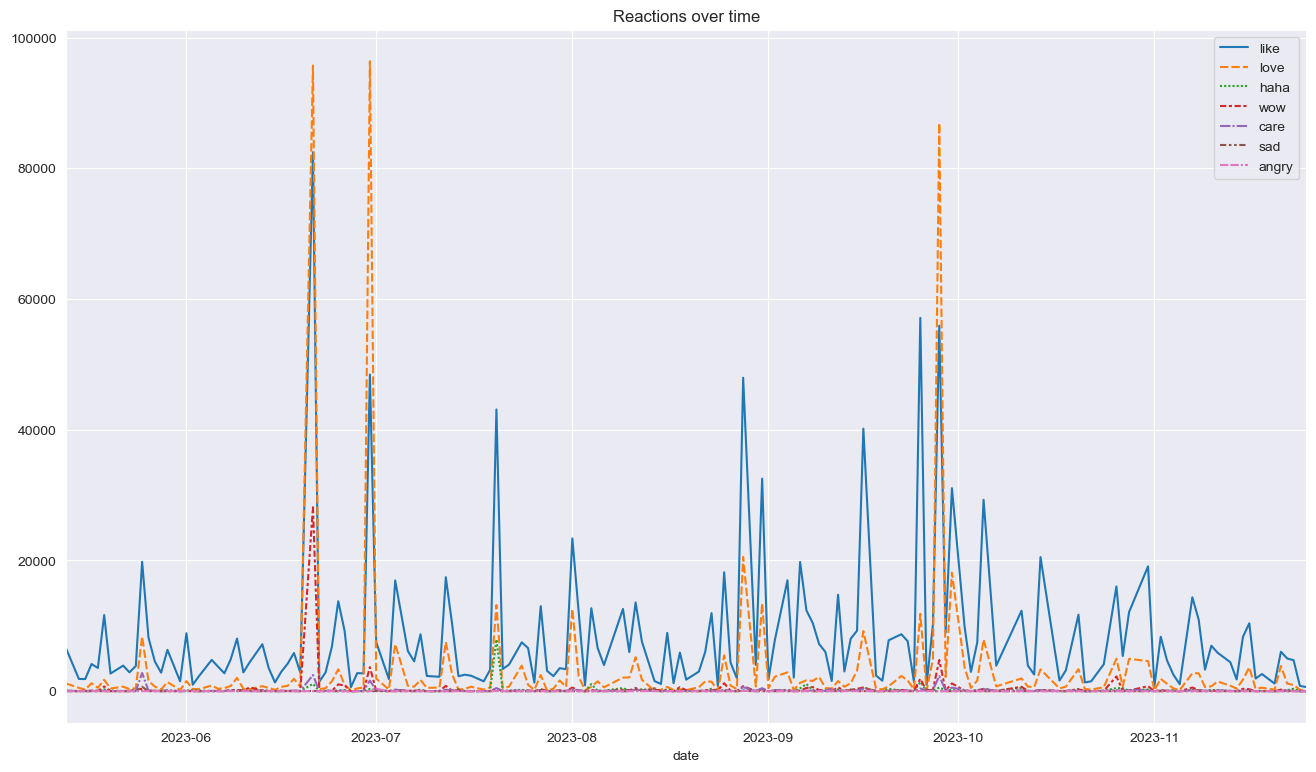

In [115]:
all_reactions['date'] = NASA['date']
date_reactions = pd.DataFrame(all_reactions.groupby('date').sum())

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(data=date_reactions)
plt.xlim(begin_date, end_date)
plt.title('Reactions over time')

In [116]:
max_love = all_reactions[all_reactions['love'] > all_reactions['like']]
NASA[NASA['date'].isin(max_love['date']) & (NASA['reaction_count'] > 100000)]


post_url  \
95   https://facebook.com/story.php?story_fbid=pfbi...   
256  https://facebook.com/story.php?story_fbid=pfbi...   
274  https://facebook.com/story.php?story_fbid=pfbi...   

                                                  text                time  \
95   Welcome home, Frank!\n\nAfter a record-breakin... 2023-09-28 01:09:31   
256  Wake up, babe. NASA's James Webb Space Telesco... 2023-06-30 23:51:12   
274  Hear that? That’s the sound of space.\n\nWe’ve... 2023-06-21 03:22:00   

     comments  shares                                               link  \
95     4307.0   51418  https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...   
256    3936.0   63257  https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...   
274    6734.0   55947  https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...   

                                                 links  \
95   [{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...   
256  [{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...   
274  [{'link': '/chandraxrayobservatory?eav=AfZe37J...   

                                              username comments_full  \
95   NASA - National Aeronautics and Space Administ...            []   
256  NASA - National Aeronautics and Space Administ...            []   
274  NASA - National Aeronautics and Space Administ...            []   

                                             reactions  reaction_count  \
95   {'like': 55254, 'love': 86757, 'haha': 560, 'w...          149673   
256  {'like': 38336, 'love': 93026, 'haha': 285, 'w...          136631   
274  {'like': 76402, 'love': 94196, 'haha': 1086, '...          202242   

    was_live        date  hours  
95     False  2023-09-28      1  
256    False  2023-06-30     23  
274    False  2023-06-21      3

## Comment analysis

In [117]:
import datetime
comments_list = NASA['comments_full'].to_list()
all_comments = []
for comments in comments_list:
    comments = list(eval(comments))
    for comment in comments:
        all_comments.append(comment)


I want to get all the commenter/replier and what they said


In [118]:
def get_user_comment(req_comment, dist):
    """
    This function return all the comments and its replies information and append it to dist
    :param req_comment: A dist, the comment we need to extract
    :param dist: A list, the destination
    :return:
    """
    if 'replies' in req_comment.keys():
        for reply in req_comment['replies']:
            get_user_comment(reply, dist)
    dist.append(dict({
        'commenter_id' : req_comment['commenter_id'],
        'comment_text': req_comment['comment_text']
    }))
    return

In [119]:
all_comments_replies = []
for comment in all_comments:
    get_user_comment(req_comment=comment, dist=all_comments_replies)

In [120]:
all_uid = [rep['commenter_id'] for rep in all_comments_replies]
pd.Series(all_uid).to_csv('Data/uid.csv', index=False)

all_comments_text = [rep['comment_text'] for rep in all_comments_replies]

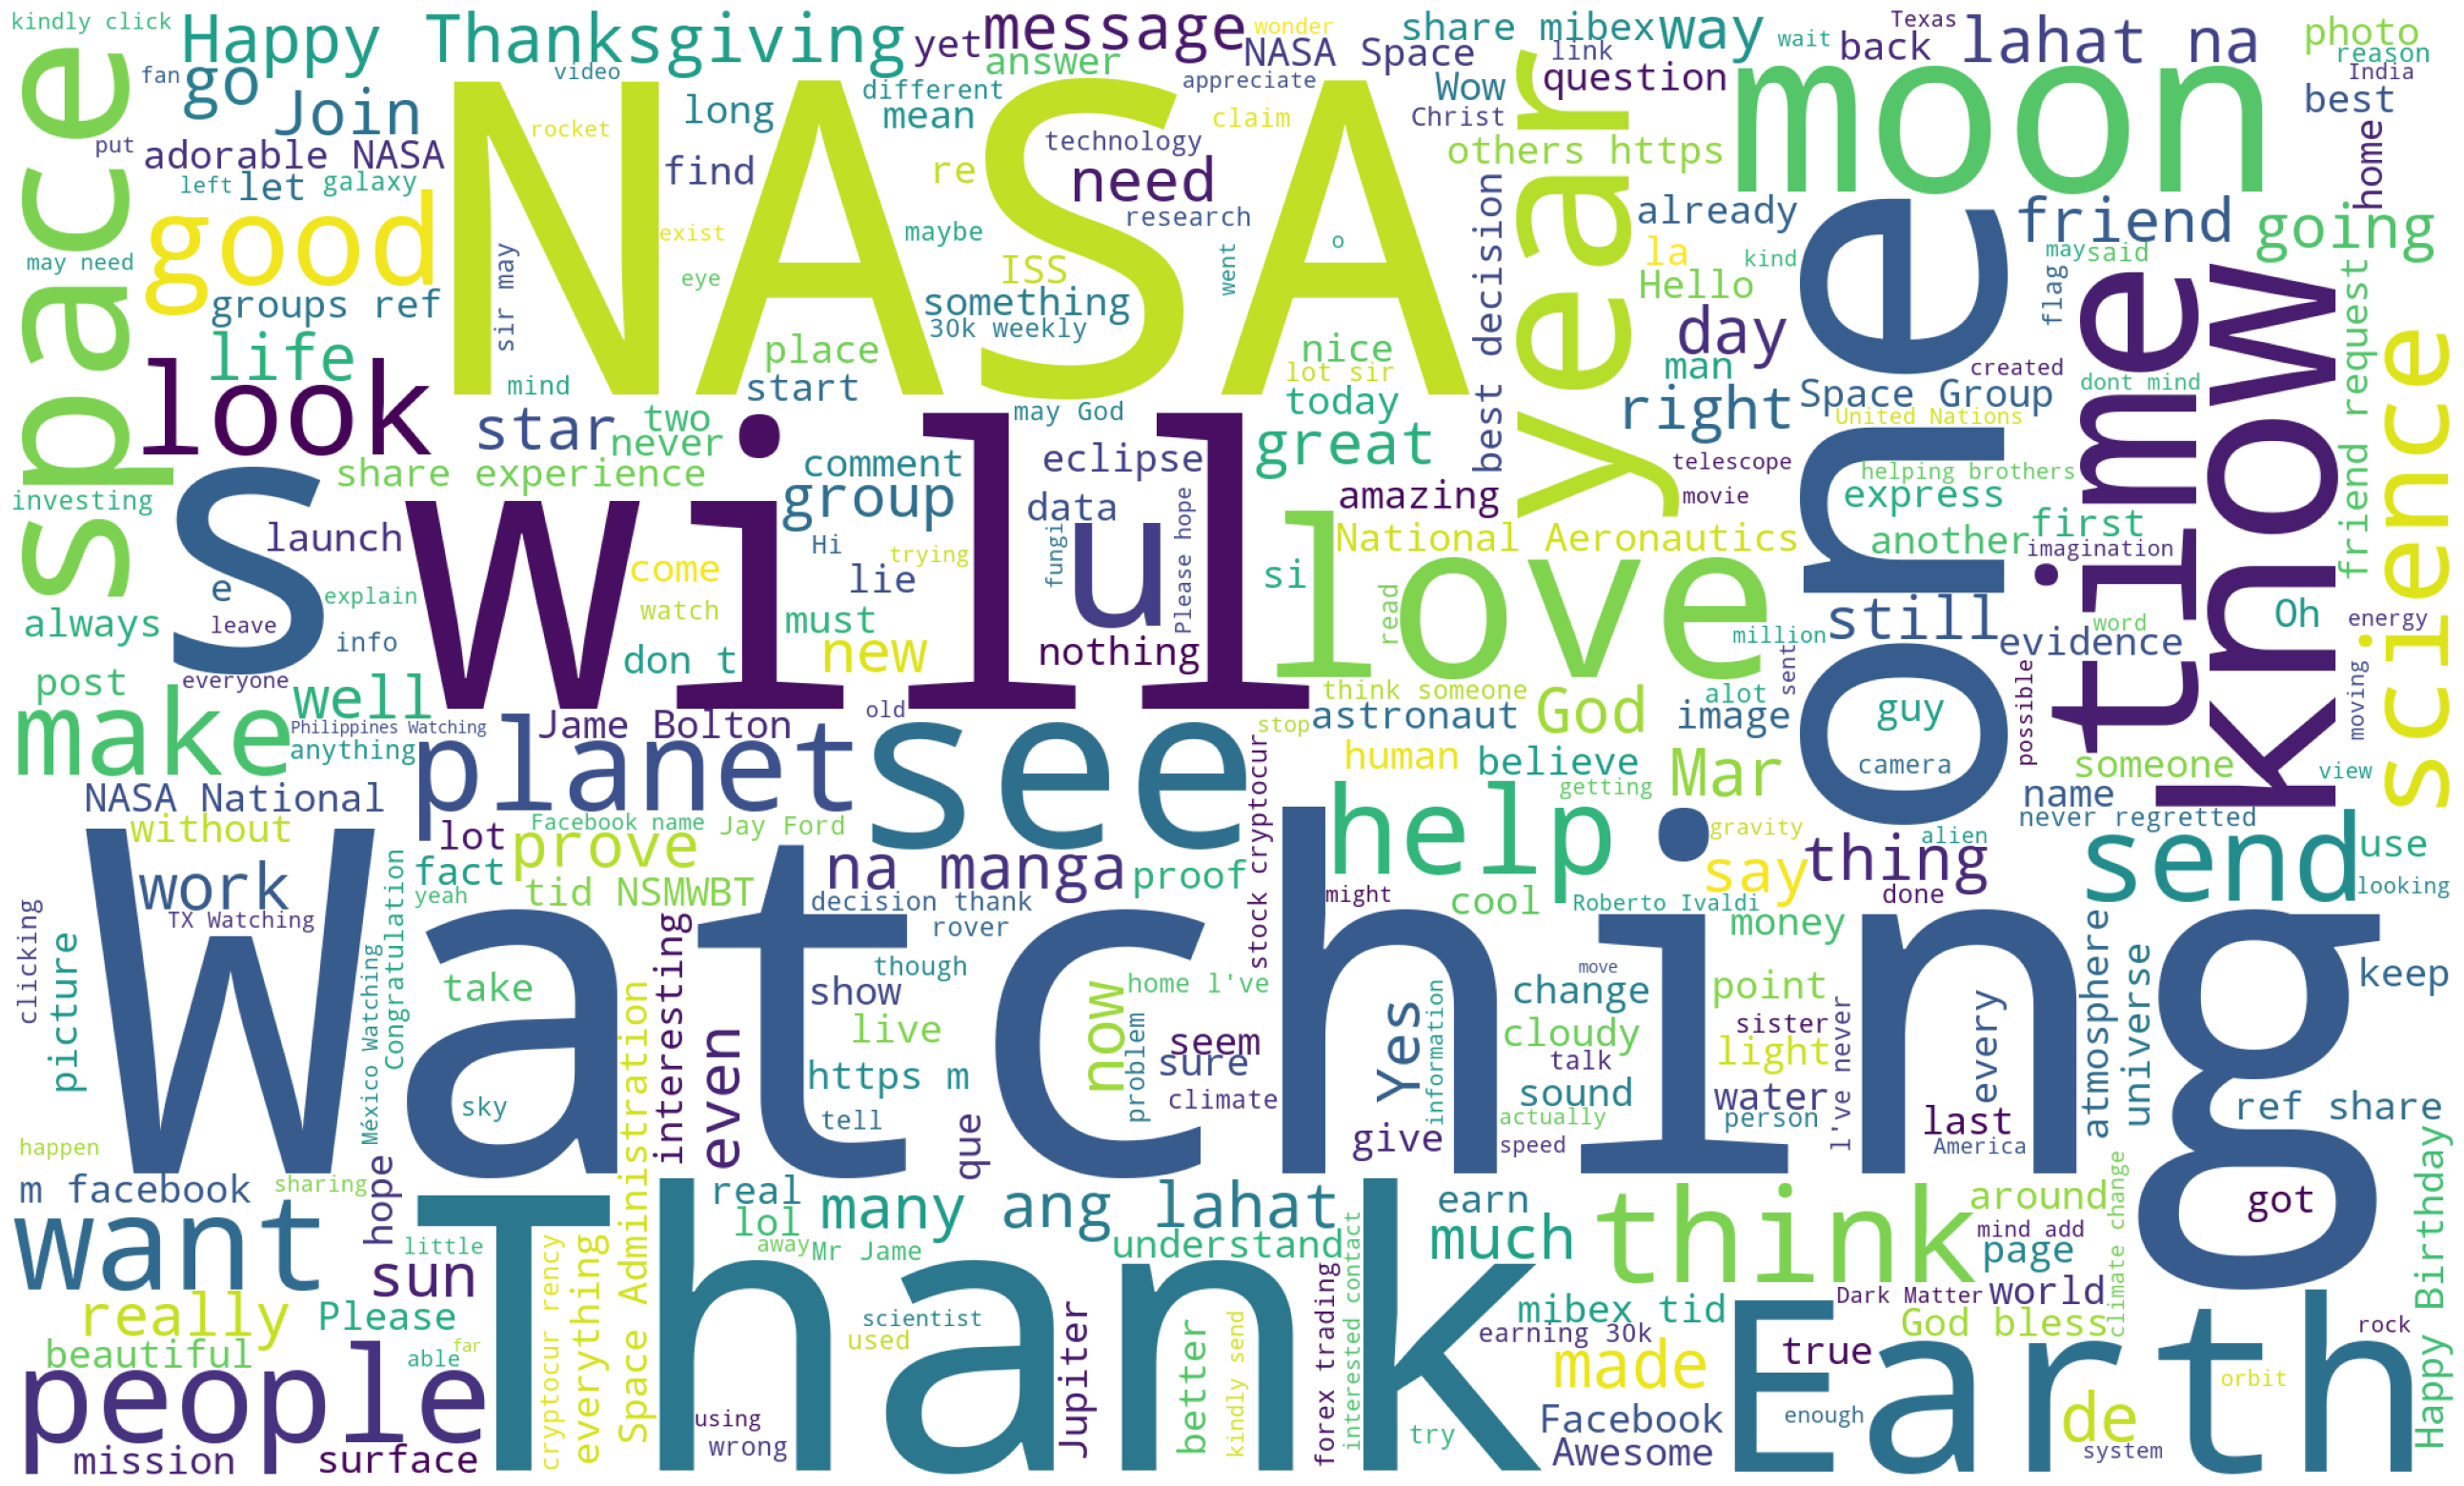

In [121]:
comment_join = ' '.join(all_comments_text)
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                      ).generate(comment_join)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [122]:
#%pip install langdetect

In [123]:
from langdetect import detect
all_language = []
for text in all_comments_text:
    try:
        all_language.append(detect(text))
    except Exception as e:
        all_language.append('other/none')

In [124]:
lang = pd.Series(all_language)
count = lang.value_counts()
count

en            6035
other/none     299
de             178
es             154
fr             117
tl              87
it              79
id              79
so              75
af              62
nl              60
pt              56
ar              54
tr              49
ro              48
sw              48
sv              46
vi              45
cy              40
ca              39
da              36
no              34
et              34
pl              33
fi              22
hr              20
sl              17
lt              16
hu              15
sk              12
sq              10
ko               9
th               8
ur               6
he               4
cs               4
ru               3
bg               3
mk               3
fa               3
lv               3
ne               2
hi               1
zh-cn            1
ja               1
el               1
dtype: int64

In [127]:
filtered_lang = {}
other = 0
for lang in count.index:
    if (count[lang] < 100) or (lang == 'other/none'):
        other += count[lang]
    else:
        filtered_lang[lang] = count[lang]

filtered_lang['other/none'] = other



Text(0.5, 1.0, "Comment's language")

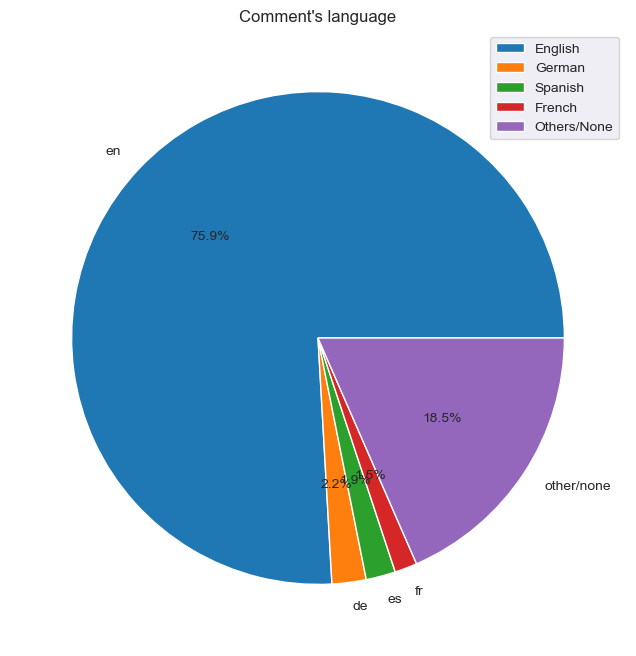

In [128]:
fig, ax = plt.subplots(figsize=(8,8))
filtered_lang = pd.Series(filtered_lang)
plt.pie(filtered_lang, labels=list(filtered_lang.keys()), autopct='%1.1f%%')
plt.legend(['English', 'German', 'Spanish', 'French', 'Others/None'])
plt.title('Comment\'s language')